# Определение перспективного тарифа для телеком-компании

Заказчик исследования — компания "Мегалайн", федеральный оператор сотовой связи. Нужно разобраться, какой из двух представленных тарифных планов "Смарт" и "Ультра" приносит компании больше денег. Входные данные от компании — описание тарифов и статистика по 500 пользователям "Мегалайна" за 2018 год. Наша задача - по этим выборочным данным выявить оптимальный для компании тариф. 

Результаты исследования будут учтены при корректировке рекламного бюджета компании.

**Цель исследования**: выявить оптимальный для прибыли компании тариф "Смарт" или "Ультра"

**Ход исследования**:

Входные данные от "Мегалайна" - статистика по 500 пользователям определённого тарифа за 2018 год, а также полные расценки всех возможных услуг в рамках двух представленных тарифов связи. О качестве данных ничего неизвестно, поэтому понадобится обзор данных. Полученные данные будут проверены на ошибки и, в случае необходимости, будут исправлены, далее подготовим данные в корректную под цель исследования форму, проведем исследовательский анализ и, в завершении, разберемся со статистическим анализом, тем самым ответив на цель исследования. 

Таким образом, исследование пройдёт в 4 этапа:
 
 1. Изучение данных из файлов.
 2. Предобработка данных.
 3. Исследовательский анализ данных.
 4. Статистический анализ данных.

## Изучение данных из файлов

Перед тем, как приступать к изучение данных из файлов, импортируем все необходимые для проведения исследования библиотеки:

In [1]:
#импортируем библиотеки pandas, numpy, stats
import pandas as pd
import numpy as np
from scipy import stats as st 

Прочитаем полученные файлы из папки /datasets и сохраним их в переменных:

In [2]:
users = pd.read_csv('/datasets/users.csv')
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')

Выведем на экран первые 5 строк каждой таблицы, чтобы ознакомиться с хранящимися в них данными подробнее. Начнём с таблицы `users`, в которой содержится информация о пользователях:

In [3]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Получим общую информацию о таблице:

In [4]:
#получим общую информацию о users методом info()
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


В данной таблице 8 столбцов данных двух типов: int, object. Столбцы `reg_date` и `churn_date` не представлены типом `datetime`, хотя мы видим, что тут должен быть именно он. Исправим это на этапе предобработки. Согласно документации:
* `user_id` — уникальный идентификатор пользователя;
* `first_name` — имя пользователя;
* `last_name` — фамилия пользователя;
* `age` — возраст пользователя (годы);
* `reg_date` — дата подключения тарифа (день, месяц, год);
* `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных);
* `city` — город проживания пользователя;
* `tarif` — название тарифного плана

Как видно, в столбце `churn_date` всего 38 значений. Следовательно, пользователей, которые на момент выгрузки перестали пользоваться своим тарифом, не так много. Рассмотрим таблицу `calls`, в которой содержится информация о звонках пользователей:

In [5]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


Получим общую информацию о таблице:

In [6]:
#получим общую информацию о calls методом info()
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


В таблице 4 столбца и 3 типа данных: float, int, object. При этом коичество значений везде одинаковое, ни единого пропуска нет. Столбец `call_date` не представлен типом `datetime`, хотя видно, что его данные должны быть именно в таком формате. Придется исправить это позднее. Согласно документации:

* `id` — уникальный номер звонка;
* `call_date` — дата звонка;
* `duration` — длительность звонка в минутах;
* `user_id` — идентификатор пользователя, сделавшего звонок

Рассмотрим таблицу `internet` с информацией об интернет-сессиях пользователей:

In [7]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


Получим общую информацию о таблице:

In [8]:
#получим общую информацию об internet методом info()
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


В этой таблице 5 столбцов с тремя типами данных: float, int, object. С форматом `datetime` в столбце `session_date` снова есть проблемы. Учтем это. Также в таблице есть непредвиденный столбец `Unnamed: 0`. Позже разберёмся с ним. Согласно документации:

* `id` — уникальный номер сессии;
* `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах);
* `session_date` — дата интернет-сессии;
* `user_id` — идентификатор пользователя

Взглянем на таблицу `messages` с информацией о сообщениях пользователей:

In [9]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


Получим общую информацию о таблице:

In [10]:
#получим общую информацию о messages методом info()
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


В таблице 3 столбца типов int и object. С форматом `datetime` в столбце `message_date` те же проблемы, что и в прошлых таблицах. Согласно документации:

* `id` — уникальный номер сообщения;
* `message_date` — дата сообщения;
* `user_id` — идентификатор пользователя, отправившего сообщение

Осталось посмотреть последнюю таблицу `tariffs` с информацией о тарифах:

In [11]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Получим общую информацию о таблице:

In [12]:
#получим общую информацию о tariffs методом info()
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


В этой таблице 8 строк с двумя типами int, object, при этом никаких существенных ошибок в типах данных нет. Согласно документации:

* `tariff_name` — название тарифа
* `rub_monthly_fee` — ежемесячная абонентская плата в рублях
* `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату
* `messages_included` — количество сообщений в месяц, включённых в абонентскую плату
* `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета
* `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

### Вывод

В каждой таблице содержатся данные о пользователях или об их операциях внутри тарифа сотовой связи. Одна таблица представляет собой количественные показатели, в том числе, цену по пакетам тарифов. 

Предварительно можно утверждать, что данных для выбора оптимального для прибыли компании тарифа достаточно. Однако, как удалось обнаружить, есть проблемы с типом данных: во всех таблицах был упущен тип `datetime`. Также одна таблица имеет неопознанный столбец, нуждающийся в удалении. Пропусков в таблицах нет, за исключением одного столбца, где они являются полностью корректными и не нуждаются в исправлениях. 

Таким образом, можем переходить в процедур предобработки наших данных к главным этапам исследования. 

## Предобработка данных

Сначала избавимся от столбца в таблице `internet`. Можно предположить, что этот столбец предполагался как id строки, но нам это не понадобится. 

In [13]:
#избавляемся от ненужного столбца методом drop и выводим первые 3 строки
internet = internet.drop(['Unnamed: 0'], axis=1)
internet.head(3)

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000


Как видно, теперь ненужного столбца нет. Можно переходить к следующему этапу предобработки - замене типов данных.

### Замена типов данных

Как мы уже убедились ранее, пропусков, нуждающихся в исправлении, в таблицах нет. Следовательно, можем переходить к замене типов данных там, где это необходимо. Заменим сразу во всех таблицах столбцы с датами на тип `datetime`: 

In [14]:
#заменяем столбца с датами во всех таблицах на тип datetime при помощи метода pandas
users['churn_date'] = pd.to_datetime(users['churn_date'], format="%Y-%m-%d")
users['reg_date'] = pd.to_datetime(users['reg_date'], format="%Y-%m-%d")
calls['call_date'] = pd.to_datetime(calls['call_date'], format="%Y-%m-%d")
internet['session_date'] = pd.to_datetime(internet['session_date'], format="%Y-%m-%d")
messages['message_date'] = pd.to_datetime(messages['message_date'], format="%Y-%m-%d")

Также необходимо учитывать, что оператор берёт плату по звонкам особым образом. Данный показатель всегда округляется "вверх", то есть после минуты разговора любая секунда будет стоить пользователю так же, как и полноценная минута. Необходимо округлить нужным образом столбец с длительностью разговоров и перевести столбец в целочисленный формат. Сделаем это:

In [15]:
#одной командой округляем значения "вверх" в столбце duration и оставляем целочисленный формат 
calls['duration'] = np.ceil(calls['duration']).astype('int')

На этом замена типов данных завершена. Можем переходить к подготовке данных к следующим этапам исследования.

### Подготовка данных

Посчитаем количество сделанных звонков и израсходованных минут разговора по месяцам для каждого пользователя. Для этого нам потребуется месяц каждого звонка пользователя. Добавим для этого отдельный столбец в таблицу `calls`:

In [16]:
#создаём столбец с месяцем каждого звонка
calls['month'] = calls['call_date'].dt.month

Теперь можно посчитать количество сделанных звонков и минут разговора пользователей по месяцам. Для этого воспользуемся сводными таблицами:

In [17]:
#при помощи сводных таблиц создаём таблицу, где каждому пользователю соответствует количество 
# и продолжительность звонков по месяцам
pivot_calls = pd.pivot_table(calls, index=['user_id', 'month'], values='duration', aggfunc=['count', 'sum'])
pivot_calls = pivot_calls.reset_index()
pivot_calls

,user_id,month,count,sum
,,,duration,duration
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340
3,1000,8,52,408
4,1000,9,58,466
...,...,...,...,...
3169,1498,10,41,247
3170,1499,9,9,70
3171,1499,10,68,449


Таблица выглядит не слишком наглядно. Посмотрим на среднее количество звонков по всем пользователям за год:

In [18]:
pivot_calls['count'].mean()

duration    63.833333
dtype: float64

In [19]:
#находим среднюю длительность одного разговора по всем пользователям
pivot_calls['sum'].mean() / pivot_calls['count'].mean()

duration    7.158198
dtype: float64

В течение года длительность разговора среднего пользователя, по нашим данным, составляет чуть более 7 минут. Любопытная статистика, которая еще пригодится нам для дальнейшего исследования. Перед тем, как переходить далее, обращаем внимание, что в сводной таблице появились некорректные названия и мультииндексы, с которыми будет проблематично работать, поэтому переименуем столбцы таблицы:

In [20]:
#сглаживаем мультииндексы, а затем переименовываем их на нужные 
pivot_calls.columns = pivot_calls.columns.to_flat_index()
pivot_calls = pivot_calls.rename(columns={('user_id', ''): 'user_id', ('month', ''): 'month', 
                                          ('count', 'duration'): 'count_calls', ('sum', 'duration'): 'duration_calls'})

Теперь найдём количество отправленных пользователями сообщений по месяцам. Сначала, для этого добавим в таблицу `messages` столбец с месяцем:

In [21]:
#создаём столбец с месяцем каждого сообщения
messages['month'] = messages['message_date'].dt.month

Теперь применим сводные таблицы и рассчитаем количество отправленных пользователями сообщений по месяцам:

In [22]:
#при помощи сводных таблиц создаём таблицу, где каждому пользователю соответствует количество сообщений по месяцам
pivot_messages = pd.pivot_table(messages, index=['user_id', 'month'], values='id', aggfunc='count')
pivot_messages = pivot_messages.reset_index()
pivot_messages

,user_id,month,id
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


Чтобы далее не забыть, что значит данный столбец, сразу переименуем его в нужный:

In [23]:
#переименовываем столбец id в count_messages
pivot_messages = pivot_messages.rename(columns={'id': 'count_messages'})

Теперь обратимся к объему израсходованного интернет-трафика пользователей по месяцам. Перед этим добавим в таблицу `internet` месяцы:

In [24]:
#создаём столбец с месяцем каждого расхода интернет-трафика пользователями
internet['month'] = internet['session_date'].dt.month

Применим сводные таблицы и рассчитаем количество интернет-трафика по месяцам для каждого:

In [25]:
#при помощи сводных таблиц создаём таблицу, где каждому пользователю соответствует интернет-трафик по месяцам
pivot_internet = pd.pivot_table(internet, index=['user_id', 'month'], values='mb_used', aggfunc='sum')
pivot_internet = pivot_internet.reset_index()
pivot_internet

,user_id,month,mb_used
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91
...,...,...,...
3198,1498,10,20579.36
3199,1499,9,1845.75
3200,1499,10,17788.51
3201,1499,11,17963.31


По интернет-трафику у оператора существует следующее правило: если пользователь использовал хотя бы 1 МБ свыше первого ГБ, то оператор считает это как 2 ГБ. Следовательно, необходимо перевести МБ в нашей таблице в ГБ с округлением "вверх" и переводом в целочисленный формат. Сделаем это:

In [26]:
#переводим МБ в ГБ в таблице и округляем значения "вверх" до целочисленного значения
pivot_internet['mb_used'] = pivot_internet['mb_used'] / 1024
pivot_internet['mb_used'] = np.ceil(pivot_internet['mb_used']).astype('int')
pivot_internet

,user_id,month,mb_used
0,1000,5,3
1,1000,6,23
2,1000,7,14
3,1000,8,14
4,1000,9,15
...,...,...,...
3198,1498,10,21
3199,1499,9,2
3200,1499,10,18
3201,1499,11,18


Также стоит сменить название столбца в нашей столбце, так как мы изменили единицы измерения в ней:

In [27]:
#меняем название столбца в таблице
pivot_internet = pivot_internet.rename(columns={'mb_used': 'gb_used'})

Наконец, необходимо найти помесячную выручку с каждого пользователя. Для этого вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножим на значение из тарифного плана и прибавим абонентскую плату по тарифу. Однако, для начала необходимо объединить три наши сводные таблицы воедино:

In [28]:
df = pivot_calls.merge(pivot_messages, on=['user_id', 'month'], how='outer')
df = df.merge(pivot_internet, on=['user_id', 'month'], how='outer')
df

,user_id,month,count_calls,duration_calls,count_messages,gb_used
0,1000,5,22.0,159.0,22.0,3.0
1,1000,6,43.0,172.0,60.0,23.0
2,1000,7,47.0,340.0,75.0,14.0
3,1000,8,52.0,408.0,81.0,14.0
4,1000,9,58.0,466.0,57.0,15.0
...,...,...,...,...,...,...
3209,1489,9,NaN,NaN,32.0,17.0
3210,1489,10,NaN,NaN,21.0,20.0
3211,1489,11,NaN,NaN,20.0,18.0
3212,1489,12,NaN,NaN,35.0,17.0


Получилось 3214 строк. Применив объединение с помощью `outer` мы не потеряли тех, кто, например, пользовался интернетом, но не совершал звонков. Теперь необходимо отличить различные тарифы пользователей. Для этого нужно соединить таблицу `users` с получившейся таблицей `df`. Тогда можно будет переходить к расчётам.

In [29]:
#объединяем таблицы с расчётами с таблицей users и выводим на экран первые 5 строк таблицы df
df = df.merge(users, on='user_id', how='left')
df.head()

,user_id,month,count_calls,duration_calls,count_messages,gb_used,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,22.0,159.0,22.0,3.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,43.0,172.0,60.0,23.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,47.0,340.0,75.0,14.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,52.0,408.0,81.0,14.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,58.0,466.0,57.0,15.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


Наконец, пора что-то сделать с нашей последней стартовой таблицей - `tariffs`. Мы объединим её с таблицей `df`, чтобы информация по расценкам тарифов была сразу доступна из одного источника, но перед этим изменим имена столбцов `tariff_name` и `mb_per_month_included` в таблице `tariffs` на `tariff` для удачного объединения:

In [30]:
#изменяем название столбца в таблице tariffs и выводим её на экран
tariffs = tariffs.rename(columns={'messages_included': 'messages_included', 
                                  'mb_per_month_included': 'gb_per_month_included',
                                  'minutes_included': 'minutes_included',
                                  'rub_monthly_fee': 'rub_monthly_fee',
                                  'rub_per_gb': 'rub_per_gb',
                                  'rub_per_message': 'rub_per_message',
                                  'rub_per_minute': 'rub_per_minute',
                                  'tariff_name': 'tariff'})
tariffs

,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


В таблице `tariffs` оператор указал плату поверх тарифа за интернет-трафик за МБ, хотя мы уже перевели их в `df` в ГБ и сразу переименовали столбец. Чтобы упростить жизнь, переведём их и в `tariffs`:

In [31]:
#переводим МБ в таблице в ГБ и переводим столбец в целочисленный формат
tariffs['gb_per_month_included'] = (tariffs['gb_per_month_included'] / 1024).astype('int')

Теперь объединим таблицы `df` и `tariffs` в одну таблицу `df`:

In [32]:
#объединяем таблицы df и tariffs и выводим первые 3 строки на экран
df = df.merge(tariffs, on='tariff', how='left')
df.head(3)

,user_id,month,count_calls,duration_calls,count_messages,gb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,22.0,159.0,22.0,3.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1
1,1000,6,43.0,172.0,60.0,23.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1
2,1000,7,47.0,340.0,75.0,14.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1


Наконец, можем рассчитывать выручку с каждого пользователя. Для этого по ранее описанному алгоритму составим следующую функцию:

In [33]:
#составляем функцию по подсчёту выручку с пользователя в таблице
def revenue_func(row):
    revenue = row['rub_monthly_fee']
    messages = (row['count_messages'] - row['messages_included']) * row['rub_per_message']
    calls = (row['duration_calls'] - row['minutes_included']) * row['rub_per_minute']
    internet = (row['gb_used'] - row['gb_per_month_included']) * row['rub_per_gb']
    if messages > 0:
        revenue += messages
    if calls > 0:
        revenue += calls
    if internet > 0:
         revenue += internet
    return revenue

Теперь нужно применить функцию к таблице `df` и получить сумму выручки по каждому пользователю:

In [34]:
#создаём столбец 'revenue', где функция рассчитает прибыль с пользователя
df['revenue'] = df.apply(revenue_func, axis=1)

### Вывод

На этапе предобработки мы избавились от ненужного столбца в таблице и заменили все некорректные типы переменных на нужные. После этого подготовили все наши таблицы, а затем склеили их в одну. Также рассчитали различные метрики по пользователям, которые пригодятся нам на следующем этапе исследования. Наконец, для каждого пользователя в таблицу была включена выручка с него для компании - важнейшая метрика данной работы! Несмотря на то, что данные прислали в качественном виде, над ними пришлось достаточно много поработать, чтобы подготовить их к основному этапу исследования.

## Исследовательский анализ данных

Опишем поведения пользователя, исходя из выборки и наших полученных данных. У нас есть 2 тарифа, поэтому необходимо посмотреть, как отличается поведение пользователей в зависимости от их выбора. Начнём с изучения минут разговора, а для этого посчитаем некоторые статистики этого фактора:

In [35]:
#группируем таблицу по тарифу, а затем для потраченных минут считаем среднее, дисперсию и стандартное отклонение
df.groupby('tariff').agg({'duration_calls': ['mean','var','std']})

duration_calls                          
                 mean           var         std
tariff                                         
smart      419.062978  35844.189551  189.325618
ultra      545.451104  94203.418396  306.925754

Таким образом, мы получили среднюю статистику за месяц по пользователям двух тарифов. Как видно, пользователи тарифа "Ultra" в среднем на 2 часа общаются больше, чем пользователи тарифа "Smart". Это можно объяснить тем, что этот тариф приобретают те, кому нужно больше минут для общения, поэтому они, как следствие, и общаются больше. С другой стороны, стандартное отклонение в данном тарифе довольно большое - почти 307. Если применить закон трёх сигм, становится очевидно, что пользователей, которые общаются в месяц более 1500 минут менее 1%, хотя в данном тарифе заложено 3000 бесплатных минут. Возможно, пользователи этого тарифа выбирали его за что-то другое, с чем мы еще поработаем далее. Перейдём к количеству сообщений:

In [36]:
#группируем таблицу по тарифу, а затем для количества сообщений считаем среднее, дисперсию и стандартное отклонение
df.groupby('tariff').agg({'count_messages': ['mean','var','std']})

count_messages                        
                 mean          var        std
tariff                                       
smart       38.716441   717.594201  26.787949
ultra       61.161006  2109.659183  45.931026

В тарифе "Smart" заложено 50 бесплатных сообщений, и пользователи в среднем в месяц отправляют около 39. Они почти приближаются к границе, хотя казалось бы, что сейчас для этих сообщений есть множество мессенджеров. Пользователи тарифа "Ultra" не слишком сильно отклонились от первых и отправляют около 61 сообщения в месяц, при этом тут стандартное отклонение, как можно было ожидать после анализа звонков, снова выше, чем у пользователей "Smart". Тем не менее, близких к 1000 бесплатных сообщений пользователей вновь менее 1% (по закону трёх сигм). Рассмотрим объём интернет-трафика:

In [37]:
#группируем таблицу по тарифу, а затем для интернет-трафика считаем среднее, дисперсию и стандартное отклонение
df.groupby('tariff').agg({'gb_used': ['mean','var','std']})

gb_used                     
             mean        var       std
tariff                                
smart   16.336176  32.923756  5.737923
ultra   19.694359  94.146734  9.702924

Тут наша статистика вышла интереснее. В среднем пользователи тарифа "Smart" используют в месяц 16 ГБ при бесплатных 15. То есть, в среднем за 1 дополнительный ГБ им приходится доплачивать оператору, при этом стандартное отклонение говорит, что у нас имеется немало тех пользователей, кто платит за 6 дополнительных ГБ и даже больше. Пользователи тарифа "Ultra" в среднем используют 19.7 ГБ при бесплатных 30. С другой стороны, по закону трёх сигм мы понимаем, что у нас есть пользователи, которые доплачивают за дополнительные ГБ даже тут, о чём нам говорит стандартное отклонение. 

Перед построением гистограмм создадим 2 таблицы по различным тарифам:

In [38]:
df_ultra = df[df['tariff'] == 'ultra']
df_smart = df[df['tariff'] == 'smart']

Теперь можем переходить к построению гистограммы потраченных пользователями минут:

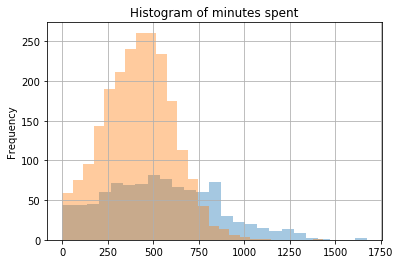

In [39]:
#строим гистограмму потраченных пользователями минут по различным тарифам
plt_calls = df_ultra['duration_calls'].plot(kind='hist', alpha=0.4, bins=25, title='Histogram of minutes spent')
plt_calls = df_smart['duration_calls'].plot(kind='hist', alpha=0.4, bins=25, grid=True)

На гистограмме тут и далее синем цветом обозначен тариф "Ultra", бежевым - "Smart". По распределению видим, что распределение пользователей тарифа "Smart" похоже на нормальное, но имеет справа небольшой хвост. Пользователи "Ultra" имеют большой разброс, как мы уже отмечали ранее. Тем не менее, несмотря на существенную разницу в количестве бесплатных минут, средние значения у обоих групп находятся недалеко друг от друга. 

Рассмотрим гистограмму по сообщениям:

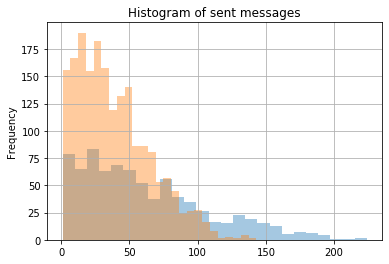

In [40]:
#строим гистограмму отправленных пользователями сообщений по различным тарифам
plt_messages = df_ultra['count_messages'].plot(kind='hist', alpha=0.4, bins=25, title='Histogram of sent messages')
plt_messages = df_smart['count_messages'].plot(kind='hist', alpha=0.4, bins=25, grid=True)

Тут распределения сильно далеки от нормальных, при этом у обоих групп среднее количество сообщений находится в пределах до 100, хотя пользователи "Ultra" всё-таки стараются реализовать свои деньги за тариф, и часть из них отправляют более 100 сообщений. Вероятно, как уже было отмечено, такие низкие статистики связаны с тем, что сегодня основная часть сообщений отправляется в мессенджерах, а не при помощи сообщений на телефоне. 

Рассмотрим гистограмму по интернет-трафику:

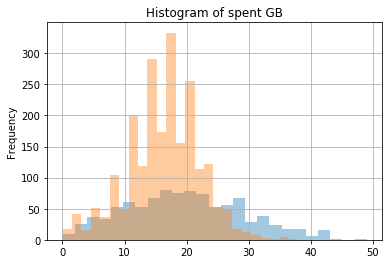

In [41]:
#строим гистограмму интернет-трафика по различным тарифам
plt_gb = df_ultra['gb_used'].plot(kind='hist', alpha=0.4, bins=25, title='Histogram of spent GB')
plt_gb = df_smart['gb_used'].plot(kind='hist', alpha=0.4, bins=25, grid=True)

Распределение по тарифу "Ultra" напоминает нормальное, а вот у "Smart" есть много скачков. Хвост тарифа "Ultra" демонстрирует нам, что тут пользователи пользуются интернетом больше, и их тариф позволяет им это, однако после 30 ГБ оба тарифа берут дополнительную плату за каждый ГБ, а пользователей, готовых за это платить, встречается немало.

### Вывод

Исследовательский анализ продемонстрировал, на сколько похожи наши группы пользователей по тарифам по различным метрикам. Так, количество сообщений у обоих оказалось, в среднем, невысоким - до 70. Значит, мессенджеры вытесняют эту функцию операторов связи. Длительность разговора у пользователей разных тарифов не слишком отличается, чего нельзя сказать про интернет-трафик, на который и приходятся основные различия между группами. Несмотря на близкие значения, пользователи "Smart" чаще приобретают дополнительный трафик. 

Теперь можно переходить к статистическому анализу данных.

## Статистический анализ данных

Проверим первую гипотезу нашего исследования: "Средняя выручка пользователей тарифов 'Ультра' и 'Смарт' различаются. Для начала сформируем нулевую и альтернативную гипотезы. Нулевая гипотеза должна ставить между этими тарифами равенство, следовательно, различий в среднем быть не должно. Альтернативная противоречит нулевой, следовательно, различия (не имеет значения, какие именно) должны быть. 
* H0: "Средняя выручка пользователей тарифов 'Ультра' и 'Смарт' не различается."
* H1: "Средняя выручка пользователей тарифов 'Ультра' и 'Смарт' различается.

Для проверки потребуется использовать двусторонний t-тест, так как для проверки средних двух совокупностей необходимо применять t-тест, а двусторонний, так как нам не имеет значения, больше выручка от одного тарифа или меньше другого. Зададим уровень значимости в 0.01 для надёжных результатов. Найдём p-value и решим, отвергать ли нулевую гипотезу: 

In [42]:
#задаём уровень значимости и находим p-value для отвержения или принятия гипотезы
alpha = .01
results = st.ttest_ind(df_ultra['revenue'], df_smart['revenue'])
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  1.4229814360764067e-160
Отвергаем нулевую гипотезу


Таким образом, крайне маленький p-value заставляет нас отвергнуть нулевую гипотезу в пользу альтернативной. Значит, средняя выручка тарифов "Ультра" и "Смарт" различается. Перейдём ко второй гипотезе: "Средняя выручка выручка пользователей из Москвы отличается от выручки пользователей из других регионов." Сформулируем гипотезы:
* H0: "Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов"
* H1: "Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов"

Для данной проверки вновь используем двусторонний t-тест для двух независимых выборок. Однако, для начала создадим две таблицы, где в первой будут жители Москвы, а во второй - все остальные:

In [43]:
#создаём таблицы с пользователями из Москвы и не из Москвы
df_Moscow = df[df['city'] == 'Москва']
df_not_Moscow = df[df['city'] != 'Москва']

Теперь можем перейти к стандартной проверке:

In [44]:
#задаём уровень значимости и находим p-value для отвержения или принятия гипотезы
alpha = .01
results = st.ttest_ind(df_Moscow['revenue'], df_not_Moscow['revenue'])
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.5440152911670224
Не получилось отвергнуть нулевую гипотезу


Какой бы уровень значимости мы ни задали, всё равно наше p-value слишком велико. Значит, между пользователями из Москвы и из других регионов в нашем исследовании разницы нет, а мы не можем отвергнуть нулевую гипотезу. 

### Вывод

В ходе статистической проверки двух гипотез нам удалось установить следующее:
* Средняя выручка пользователей тарифа "Ультра" и "Смарт" различаются
* Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов

В обоих случаях мы применяли двусторонний t-тест для двух независимых выборок, так как наши пользователи различных тарифов никак не связаны друг с другом. На этом исследование подходит к своему завершению, и мы можем переходить к основному выводу.

## Вывод

В ходе исследования удалось разобраться в пользователях сети "Мегалайн". При помощи добавления в итоговую таблицу нескольких новых метрик мы увидели, как именно различаются или сходятся между собой пользователи по различным параметрам. Так, имеем следующее:
* В среднем пользователи обоих тарифов тратят не слишком отличающиеся друг от друга количества минут на разговоры. Пользователи "Смарт" - около 419 минут, "Ультра" - 545 минут. Это показывает, что, несмотря на широкие возможности минут у второго тарифа, эта опция не является наиболее важной при выборе пользователем тарифа.
* Сообщения теряют свою актуальность, что видно в среднем количестве отправленных сообщений менее 70 в среднем для обоих тарифов. При этом, по закону трёх сигм, 99% используют не более 200 сообщений в месяц. Предполагается, что основные сообщения сегодня отправляются в мессенджерах, поэтому эта возможность, какой бы большой её не предоставлял оператор, спросом пользоваться не будет
* Основное необходимое в тарифе сегодня - пакет интернет-трафика. Вероятно, пользователи "Ультра" выбирают тариф именно из-за его объема, превышающего доступный в "Смарте" в 2 раза. В среднем на тарифе "Смарт" тратят по 16 ГБ из доступных 15, значит, часто существует факт приобретения дополнительных ГБ, что выгодно оператору. В тарифе "Ультра" в среднем тратят по 19 ГБ, хотя стандартное отклонение чуть сильно выше, чем в "Смарте" - около 9 ГБ. 

Проверка гипотез показала, что средняя выручка пользователей тарифа "Ультра" и "Смарт" различаются. Можно говорить о том, что тариф "Ультра" приносит оператору больше денежных средств, однако стоит понимать, что основное внимание пользователей приковано именно к интернет-трафику, поэтому цену тарифа на рынке нужно регулировать, исходя из этого показателя, чтобы не встретить резкий отток пользователей. Также определённое снижение цены на тариф "Ультра" может привлечь новых клиентов, которые раньше использовали тариф "Смарт", ведь они и так часто приобретают дополнительные ГБ. Это может не только увеличить прибыль компании, но и увеличить лояльность потребителей продукта. 